# Use script by Jose to generate new TREECOOL files
(example by Jose Oñorbe himself)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import scipy.special as sps
import gen_UVB as UVB

In [2]:
# We define the redshift range. You want it to go from z=0 up to high redshift to
# track the full history but you probably do not need as many points
# as I am using here.
listz=np.arange(0.0,20,0.1)
# Now we define the reionization history of HI
# I am using my weird analytical function for this but you could use some tanh or whatever you want.
z_mid_HI_reion = 9.35
QHII=UVB.myfQHII_2(listz,z_mid_HI_reion,n1=50.,n2=1.,norm=0.5)

In [3]:
# For this ionization history we look for the redshift at which
# we assume that reionization is finished. This is where we will connect
# out high-z rates with the standard models (as HM12, etc).
# In this case first we define it as the redshift when QHII is >0.999
# Notice that this script assumes that the UVB model that you provide
# will be at a fully ionized state after reionization. So using  e.g. Puchwein+18
# could be tricky for high redshift reionization models. Happy to iterate on this.
z_HII=listz[len(QHII[QHII>0.999])-1]
# heat input for HI in K
DeltaT_HI=2E4
## Now same thing for HeII
z_end_HeII_reion=3.5
QHeIII=UVB.myfQHII_2(listz,z_end_HeII_reion,n1=50.,n2=1.,norm=0.5)
z_HeIII=listz[len(QHeIII[QHeIII>0.999])-1]
DeltaT_HeII=1.5E4

In [4]:
# We define cosmology
cosmoHM=[0.6808,0.04964,0.3191,0.6809,0.76];
# File output
treecool_dir = os.environ['LYA_EMU_REPO']+'/setup_simulations/test_sim/'
input_file = treecool_dir+'/TREECOOL_HM12.txt'
output_file='TREECOOL_test.txt'
zG,dataG=UVB.genQ2G_DeltaT(listz,QHII,z_HII,QHeIII,z_HeIII,DeltaT_HI,DeltaT_HeII,input_file=input_file,
                       cosmo=cosmoHM,Gthreshold=True,output_file=output_file)

Text(0.5, 1.0, 'Solid = Onorbe+ 2017; dashed = TREECOOL_HM12')

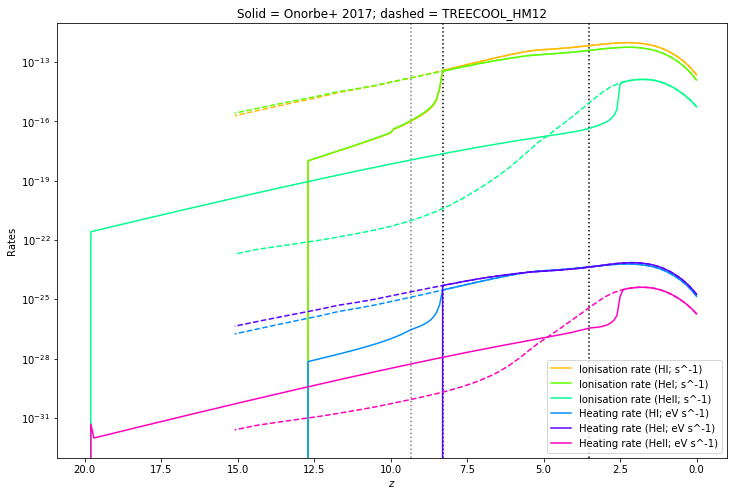

In [5]:
#Plot UVB rates
treecool_input = np.loadtxt(input_file)
treecool_test = np.loadtxt(output_file)

rate_labels = [r'Ionisation rate (HI; s^-1)', r'Ionisation rate (HeI; s^-1)', 
               r'Ionisation rate (HeII; s^-1)', r'Heating rate (HI; eV s^-1)', 
               r'Heating rate (HeI; eV s^-1)', r'Heating rate (HeII; eV s^-1)']

plt.figure(figsize=(12., 8.))
plt.axvline(x=z_mid_HI_reion, color='gray', ls=':')
plt.axvline(x=z_HII, color='black', ls=':')
plt.axvline(x=z_end_HeII_reion, color='black', ls=':')

for i in range(1, treecool_input.shape[1]):
    line_colour = mcm.gist_rainbow(i / (treecool_input.shape[1] - 1))
    plt.plot((10. ** treecool_test[:, 0]) - 1., treecool_test[:, i], color=line_colour, label=rate_labels[i-1])
    plt.plot((10. ** treecool_input[:, 0]) - 1., treecool_input[:, i], color=line_colour, ls='--')

plt.gca().invert_xaxis()
plt.yscale('log')
plt.legend()
plt.xlabel(r'$z$')
plt.ylabel(r'Rates')
plt.title(r'Solid = Onorbe+ 2017; dashed = TREECOOL_HM12')
